## Clasificacion de lofres Iris

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [23]:
X = iris.data[:,:2]
Y = iris.target

In [26]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1 # menos 1 y mas 1 es para darle margen a la imagen
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1 # menos 1 y mas 1 es para darle margen a la imagen
h = (x_max - x_min)/100 # pra calcular el incrementeo entre max y min

xx,yy = np.meshgrid(np.arange(x_min, x_max,h), np.arange(y_min,y_max,h)) 
# arange crea un arreglo de min a max con intervalo de h

x_plot = np.c_[xx.ravel(), yy.ravel()]
#Combina xx y yy

array([[1.   , 1.   , 1.   , ..., 1.   , 1.   , 1.   ],
       [1.056, 1.056, 1.056, ..., 1.056, 1.056, 1.056],
       [1.112, 1.112, 1.112, ..., 1.112, 1.112, 1.112],
       ...,
       [5.256, 5.256, 5.256, ..., 5.256, 5.256, 5.256],
       [5.312, 5.312, 5.312, ..., 5.312, 5.312, 5.312],
       [5.368, 5.368, 5.368, ..., 5.368, 5.368, 5.368]])

In [40]:
C = 1.0 # Estandar , Alta mas restrictiva, mas baja mas permisiva 
svc = svm.SVC(kernel="linear", C =C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)# reshape crea una matriz

Text(0.5,1,'SVC para las flores de Iris con Kernel Lineal')

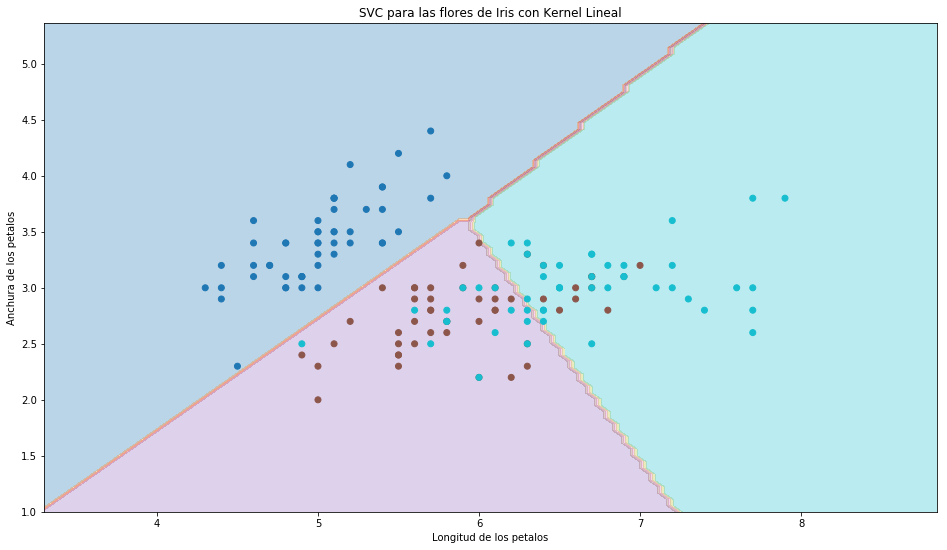

In [41]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred,cmap=plt.cm.tab10, alpha= 0.3) #Esta seria la prediccion del modelo con la division que predijo
plt.scatter(X[:,0],X[:,1], c= Y, cmap= plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchura de los petalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Lineal")

In [46]:
C = 10 # Prueba con 10 que salio de GridSearchCV Inicial es 1
svc = svm.SVC(kernel="rbf", C = C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5,1,'SVC para las flores de Isris con Kernel Radial')

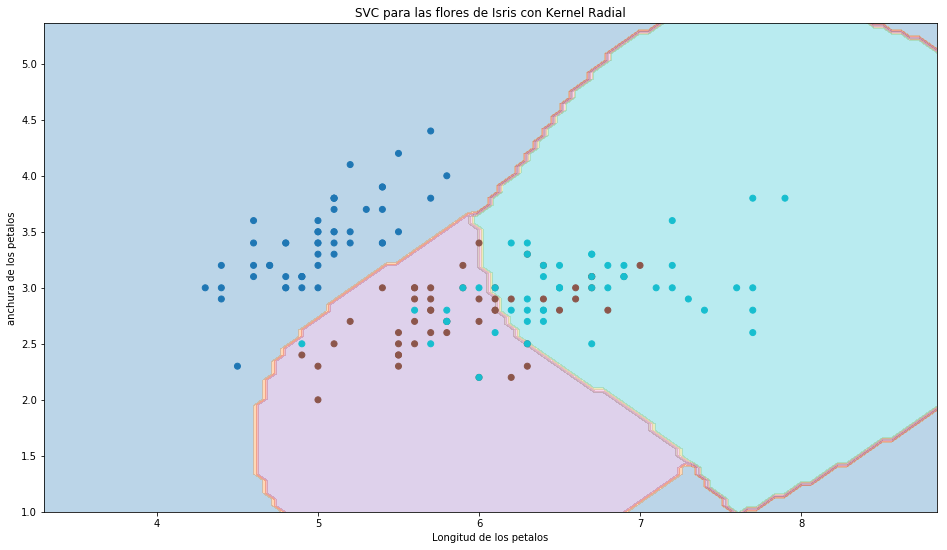

In [47]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred,cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0],X[:,1], c = Y, cmap = plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("anchura de los petalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Isris con Kernel Radial")

Text(0.5,1,'SVC para las flores de Isris con Kernel Sigmoide')

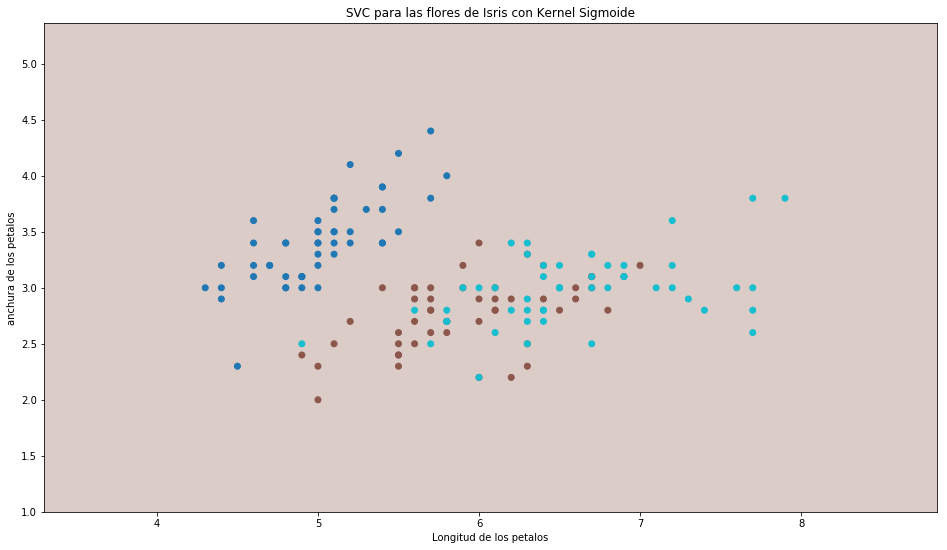

In [37]:
C = 1.0
svc = svm.SVC(kernel="sigmoid", C = C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred,cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0],X[:,1], c = Y, cmap = plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("anchura de los petalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Isris con Kernel Sigmoide")

Text(0.5,1,'SVC para las flores de Isris con Kernel Poly')

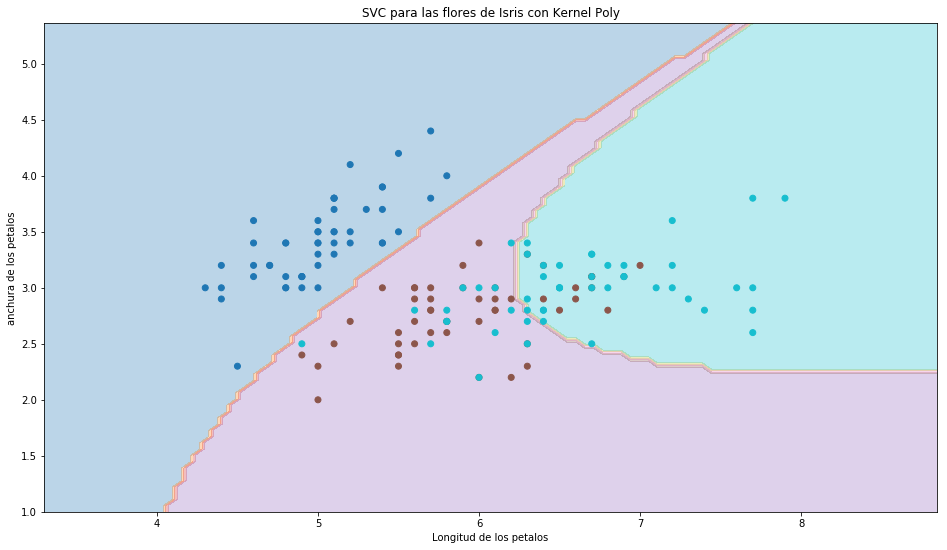

In [39]:
C = 1.0
svc = svm.SVC(kernel="poly", C = C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred,cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0],X[:,1], c = Y, cmap = plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("anchura de los petalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Isris con Kernel Poly")

## De los modelos probados parece que el mejor es rbf pero se tendria que contar el numero de puntos mal clasificados para obtener el mejor

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [12]:
X, Y = shuffle(X,Y,random_state=0)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [14]:
parameters = [
    {
        'kernel':['rbf'],
        'gamma': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5],
        'C':[1,10,100,1000]
    },
    {
        'kernel':['linear'],
        'C':[1,10,100,1000]
    }
    ]

In [15]:
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters ,cv = 5) # cv : Cross validation
clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [17]:
clf.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.00119071, 0.00110765, 0.00039873, 0.00059757, 0.00079265,
        0.00079851, 0.00019469, 0.00079474, 0.0003984 , 0.00039144,
        0.00040588, 0.00079827, 0.00099444, 0.00080214, 0.00081196,
        0.0004127 , 0.00061069, 0.00138955, 0.00059795, 0.00059967,
        0.00079803, 0.00139818, 0.002     , 0.00258255, 0.00099292,
        0.00039868, 0.00098295, 0.0051919 ]),
 'std_fit_time': array([4.01012209e-04, 8.16747564e-04, 4.88344404e-04, 4.87920429e-04,
        3.96373067e-04, 3.99258386e-04, 3.89385223e-04, 3.97430444e-04,
        4.87936213e-04, 4.79529988e-04, 4.97229308e-04, 3.99542859e-04,
        1.53679223e-05, 7.50913440e-04, 4.06377250e-04, 5.05815138e-04,
        4.98800947e-04, 7.92991726e-04, 4.88227673e-04, 4.89829898e-04,
        7.46556810e-04, 7.98897258e-04, 1.08632585e-03, 1.02080943e-03,
        6.23549299e-04, 4.88285637e-04, 6.21745178e-04, 2.77560538e-03]),
 'mean_score_time': array([0.00040469, 0.0003984 , 0.0007977 , 0.00019951, 

In [18]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m,s,p in zip(means,stds,params):
    print("%0.3f (+/-%0.3f) para %r "%(m,2*s,p))

0.747 (+/-0.124) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'} 
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} 
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'} 
0.807 (+/-0.129) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} 
0.787 (+/-0.124) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'} 
0.780 (+/-0.116) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'} 
0.747 (+/-0.124) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'} 
0.747 (+/-0.124) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} 
0.813 (+/-0.124) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} 
0.773 (+/-0.098) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} 
0.780 (+/-0.116) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'} 
0.767 (+/-0.126) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'} 
0.747 (+/-0.124) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'} 
0.813 (+/-0.124) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'} 
0.760 (+/-0.107) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'} 
0.780 (+/-0.080) para {'C

El que tiene el promedio las alto es el mas optimo 

Es este caso el promedio mas alto es 0.813 

In [19]:
ypred = clf.predict(X_test) # se puede obtener el modelo con clf.best_estimator_ o hacer directamente la prediccion

In [20]:
print(classification_report(Y_test,ypred,target_names=["setosa","versicolor","virginica"]))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       0.60      0.82      0.69        11
  virginica       0.83      0.62      0.71        16

avg / total       0.81      0.79      0.79        38



* precision: Es el coeciente de verdaderos positivos sobre verdaders positivos y falsos positivos
* recall: cociente entre verdaderos positivos y verdaderos positovas mas falsos positivos
* f_score: valor de presicion 1 maximo 0 nula

## Consejo de Gabriel

## Resumen final de la clasificacion de Iris

In [67]:
def svm_iris (C=1.0, gamma = 0.01, kernel = "rbf"):
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt
    
    isirs=  datasets.load_iris()
    
    X = iris.data[:,:2]
    Y = iris.target
    
    x_min, x_max = X[:,0].min()-1 , X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1 , X[:,1].max()+1
    h = (x_max - x_min )/ 100
    
    xx, yy = np.meshgrid(np.arange(x_min,x_max, h),np.arange(y_min,y_max, h))
    
    x_plot = np.c_[xx.ravel(),yy.ravel()]
    
    svc = svm.SVC(kernel=kernel, C = C, gamma =gamma, decision_function_shape="ovr").fit(X,Y)
    Ypred = svc.predict(x_plot)
    Ypred = Ypred.reshape(xx.shape)
    plt.figure(figsize=(10,5))
    plt.contourf(xx,yy,Ypred,cmap=plt.cm.tab10, alpha=0.3)
    plt.scatter(X[:,0],X[:,1], c = Y, cmap = plt.cm.tab10)
    plt.xlabel("Longitud de los petalos")
    plt.ylabel("anchura de los petalos")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC para las flores de Isris con Kernel: "+str(kernel))
    

In [53]:
from ipywidgets import interact, fixed

In [68]:
interact(svm_iris,
        C = [0.01,0.1,1,10,100,1000,1e6,1e10],
        gamma=[1e-5,1e-4,1e-3,1e-2,0.1,0.2,0.5,0.99],
         kernel=["rbf","linear","sigmoid","poly","precomputed"]
        )

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 1000000.0, 1000…

<function __main__.svm_iris(C=1.0, gamma=0.01, kernel='rbf')>